**Chapter 14 – Deep Computer Vision Using Convolutional Neural Networks**

❗️ **This will be very slow, unless you have a GPU (Check the instruction in https://github.com/UAPH4582/PH482_582/blob/main/INSTALL.md).**

❗️ **If you do not, then you should run this notebook in Colab, using a GPU runtime**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582/blob/main/06_deep_computer_vision_with_cnns.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

A couple utility functions to plot grayscale and RGB images:

In [4]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

# What is a Convolution?

A convolution is a mathematical operation that slides one function over another and measures the integral of their pointwise multiplication. It is the application of a filter to an input that results in a activation. For 2-D inout, such as images, a convolution involves a multiplication between a two dimensional array of weights with an array of input data. 

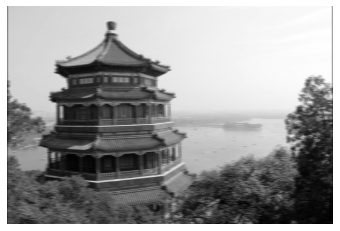

In [5]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

In [6]:
def crop(images):
    return images[150:220, 130:250]

Saving figure china_original


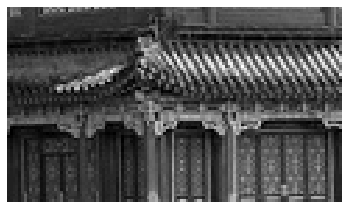

In [7]:
plot_image(crop(images[0, :, :, 0]))
save_fig("china_original", tight_layout=False)
plt.show()

### Task 1: 
#### a) Describe in the report the purpose of the filters

Saving figure china_vertical


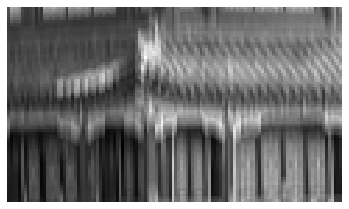

Saving figure china_horizontal


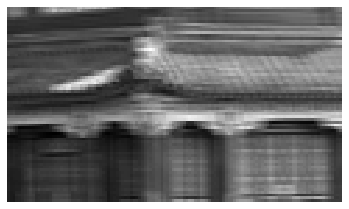

In [8]:
for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    save_fig(filename, tight_layout=False)
    plt.show()

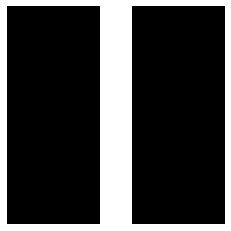

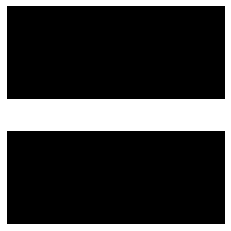

In [9]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

## Convolutional Layer

To create a 2D convulutional use `keras.layers.Conv2D()` (https://keras.io/api/layers/convolution_layers/convolution2d/), To create a 2D convulutional layer with 32 filters, kernel size of 3, 1 stride, padding=same and RELU activation. 

In [10]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)

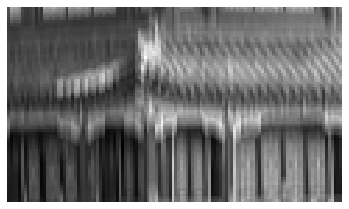

In [11]:
plot_image(crop(outputs[0, :, :, 0]))
plt.show()

In [11]:
convolution_layer = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

# Pooling layer

Pooling layers are used to shrink the input image in order to reduce the computational load, the memory usage, and the number of parameters. 

## Max pooling

### Task 2: Create a max pool layer of pool_size=2 (https://keras.io/api/layers/pooling_layers/max_pooling2d/) and apply the layer on the cropped_images assigning the result to the output variable.

In [21]:
#max_pool = 
max_pool= keras.layers.MaxPool2D(pool_size=2)

In [22]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)

In [23]:
#output = 
output=max_pool(cropped_images)

Saving figure china_max_pooling


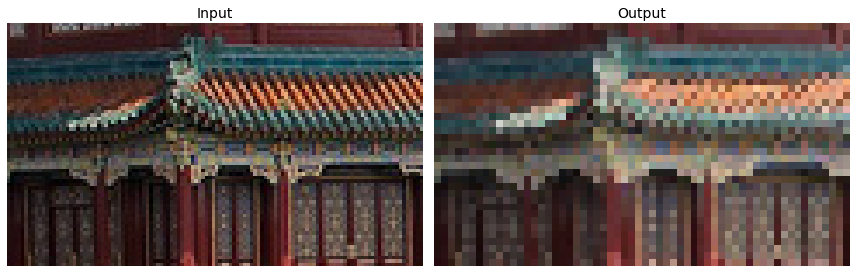

In [24]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
save_fig("china_max_pooling")
plt.show()

# Tackling Fashion MNIST With a CNN

### Task 3: 
#### a) Compile the CNN model with ADAM optimizer and train 10 epochs. 
#### b) Evaluate the test accuracy and loss.

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [49]:
# model.compile(PUT YOUR PARAMETERS HERE)
# next, fit the model to the training set
# evaluate the model on the test set
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 27s 15ms/step - loss: 1.0910 - accuracy: 0.6062 - val_loss: 0.4138 - val_accuracy: 0.8484
Epoch 2/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.4766 - accuracy: 0.8376 - val_loss: 0.3377 - val_accuracy: 0.8746
Epoch 3/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3972 - accuracy: 0.8651 - val_loss: 0.3305 - val_accuracy: 0.8814
Epoch 4/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3529 - accuracy: 0.8791 - val_loss: 0.2921 - val_accuracy: 0.8878
Epoch 5/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3159 - accuracy: 0.8905 - val_loss: 0.3127 - val_accuracy: 0.8912
Epoch 6/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3113 - accuracy: 0.8940 - val_loss: 0.3070 - val_accuracy: 0.8910
Epoch 7/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.2800 - accuracy: 0.9034 - val_loss: 0.3001 -

In [50]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3116 - accuracy: 0.8994


[0.3116356134414673, 0.899399995803833]

## ResNet-34

### Task 4: 
#### a) Compile the ResNet-34 model with ADAM optimizer and train 10 epochs. 
#### b) In the report, compare the performance the results with the ones from Task 3.

In [14]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [15]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[28, 28, 1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 14, 14, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 7, 7, 64)         

In [54]:
# model.compile(PUT YOUR PARAMETERS HERE)
# next, fit the model to the training set
# evaluate the model on the test set
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 135s 76ms/step - loss: 0.7451 - accuracy: 0.7587 - val_loss: 0.4104 - val_accuracy: 0.8456
Epoch 2/10
1719/1719 [==============================] - 131s 76ms/step - loss: 0.3742 - accuracy: 0.8682 - val_loss: 0.4480 - val_accuracy: 0.8364
Epoch 3/10
1719/1719 [==============================] - 131s 76ms/step - loss: 0.3217 - accuracy: 0.8843 - val_loss: 0.3403 - val_accuracy: 0.8782
Epoch 4/10
1719/1719 [==============================] - 131s 76ms/step - loss: 0.3400 - accuracy: 0.8828 - val_loss: 0.4364 - val_accuracy: 0.8406
Epoch 5/10
1719/1719 [==============================] - 131s 76ms/step - loss: 0.2771 - accuracy: 0.8994 - val_loss: 0.2695 - val_accuracy: 0.8982
Epoch 6/10
1719/1719 [==============================] - 131s 76ms/step - loss: 0.2343 - accuracy: 0.9148 - val_loss: 0.3043 - val_accuracy: 0.8934
Epoch 7/10
1719/1719 [==============================] - 131s 76ms/step - loss: 0.2108 - accuracy: 0.9231 - val_loss: 0

In [55]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.2951 - accuracy: 0.9005


[0.29511895775794983, 0.9004999995231628]

## Pretrained Models for Transfer Learning

In this example, we reuse a pretrained Xception model to classify pictures of flowers. During the first train the weights of the pretrained layers are frozen, while for the second train are not frozen.

### Task 5:  Compare the results from the two trains. Comment on the report. 

In [14]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

In [17]:
info.splits

{'train': <tfds.core.SplitInfo num_examples=3670>}

In [15]:
class_names = info.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [16]:
n_classes = info.features["label"].num_classes

In [17]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

**Warning:** TFDS's split API has evolved since the book was published. The [new split API](https://www.tensorflow.org/datasets/splits) (called S3) is much simpler to use:

In [18]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

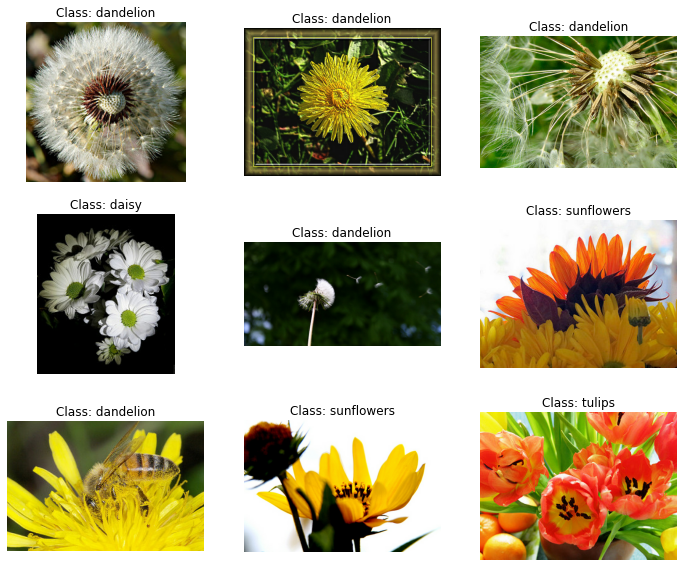

In [19]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [20]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

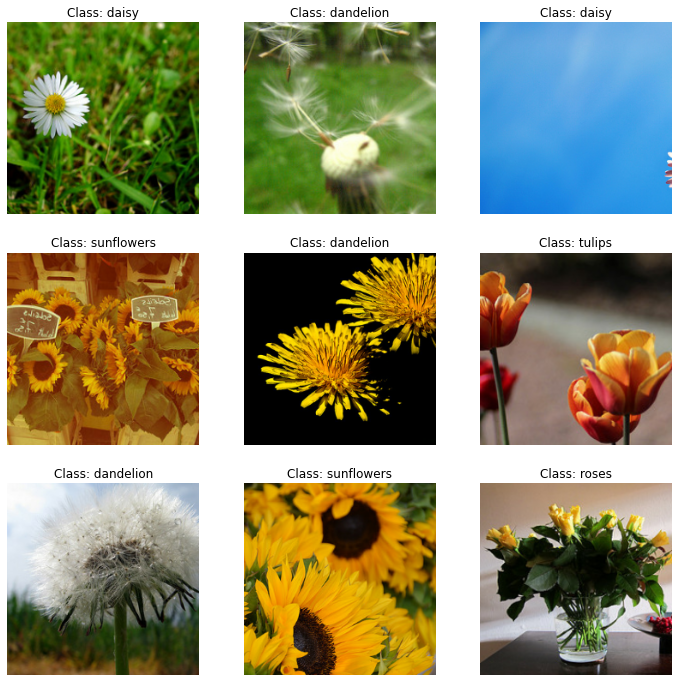

In [21]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [22]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg    = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model  = keras.models.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - 1s 0us/step


In [26]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_43
13 block2_pool
14 batch_normalization_37
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_44
23 block3_pool
24 batch_normalization_38
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_45
33 block4_pool
34 batch_normalization_39
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_se

In [27]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 19s 162ms/step - loss: 1.1804 - accuracy: 0.7279 - val_loss: 1.0516 - val_accuracy: 0.8088
Epoch 2/5
86/86 [==============================] - 13s 155ms/step - loss: 0.4057 - accuracy: 0.9075 - val_loss: 0.6720 - val_accuracy: 0.8585
Epoch 3/5
86/86 [==============================] - 14s 160ms/step - loss: 0.3058 - accuracy: 0.9257 - val_loss: 0.6076 - val_accuracy: 0.8676
Epoch 4/5
86/86 [==============================] - 14s 164ms/step - loss: 0.1972 - accuracy: 0.9339 - val_loss: 0.6764 - val_accuracy: 0.8676
Epoch 5/5
86/86 [==============================] - 14s 163ms/step - loss: 0.1567 - accuracy: 0.9544 - val_loss: 0.5419 - val_accuracy: 0.8750


In [28]:
model.evaluate(test_set)

12/12 [==============================] - 2s 191ms/step - loss: 0.5635 - accuracy: 0.8856


[0.5634883642196655, 0.8855586051940918]

In [29]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

Epoch 1/40
86/86 [==============================] - 61s 644ms/step - loss: 0.4170 - accuracy: 0.8561 - val_loss: 0.7329 - val_accuracy: 0.8162
Epoch 2/40
86/86 [==============================] - 54s 628ms/step - loss: 0.1424 - accuracy: 0.9493 - val_loss: 0.4946 - val_accuracy: 0.8603
Epoch 3/40
86/86 [==============================] - 54s 633ms/step - loss: 0.0639 - accuracy: 0.9826 - val_loss: 0.3135 - val_accuracy: 0.9136
Epoch 4/40
86/86 [==============================] - 54s 630ms/step - loss: 0.0453 - accuracy: 0.9829 - val_loss: 0.2880 - val_accuracy: 0.9246
Epoch 5/40
86/86 [==============================] - 54s 627ms/step - loss: 0.0340 - accuracy: 0.9916 - val_loss: 0.2862 - val_accuracy: 0.9210
Epoch 6/40
86/86 [==============================] - 54s 631ms/step - loss: 0.0209 - accuracy: 0.9923 - val_loss: 0.2745 - val_accuracy: 0.9338
Epoch 7/40
86/86 [==============================] - 54s 631ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.2617 - val_accuracy: 0.9320

In [30]:
model.evaluate(test_set)

12/12 [==============================] - 2s 120ms/step - loss: 0.2190 - accuracy: 0.9537


[0.21900522708892822, 0.9536784887313843]

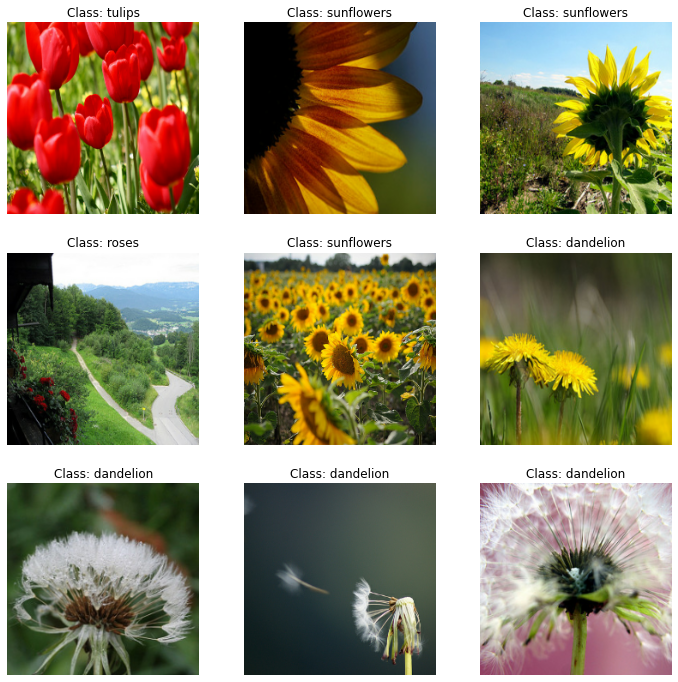

In [31]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

# Exercises

## 1. High Accuracy CNN for MNIST
_Exercise: Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST._

The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set. This places this model roughly in the top 20% in the [MNIST Kaggle competition](https://www.kaggle.com/c/digit-recognizer/) (if we ignore the models with an accuracy greater than 99.79% which were most likely trained on the test set, as explained by Chris Deotte in [this post](https://www.kaggle.com/c/digit-recognizer/discussion/61480)). 

In order to reach an accuracy higher than 99.5% on the test set:

a) add batch normalization layers (https://keras.io/api/layers/normalization_layers/batch_normalization/)

b) set a learning schedul (Check Chapter 11)

c) add image augmentation (Check Chapter 14)

d) create an ensemble (Check Chapter 14)    

In [15]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [16]:
from keras.preprocessing.image import ImageDataGenerator
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

nets = 5
model = [0] *nets

for j in range(nets):
    model[j] = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),    
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Conv2D(64,kernel_size=3,activation='relu'),  
    keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")])
    model[j].compile(loss="sparse_categorical_crossentropy", optimizer='adam',
              metrics=["accuracy"])

               
                    
                 
                    


In [17]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=0, factor=0.5, min_lr=0.00001)

In [18]:
from sklearn.model_selection import train_test_split
# train for 20 epochs
history = [0] * nets
epochs = 20

datagen = ImageDataGenerator(rotation_range=13, zoom_range=0.11, width_shift_range=0.1, height_shift_range=0.1)

datagen.fit(X_train)

for j in range(nets):
    print(f'Individual Net : {j+1}')   
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, y_train, test_size = 0.1)
    history[j] = model[j].fit(datagen.flow(X_train2,Y_train2, batch_size=64), epochs = epochs, steps_per_epoch = X_train2.shape[0]//64, validation_data = (X_val2,Y_val2), callbacks=[learning_rate_reduction], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train loss={2:.5f}, Validation loss={3:.5f}".format(j+1,epochs,max(history[j].history['loss']),max(history[j].history['val_loss']) ))
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Individual Net : 1
CNN 1: Epochs=20, Train loss=0.54149, Validation loss=0.10352
CNN 1: Epochs=20, Train accuracy=0.98540, Validation accuracy=0.99382
Individual Net : 2
CNN 2: Epochs=20, Train loss=0.58363, Validation loss=0.11024
CNN 2: Epochs=20, Train accuracy=0.98566, Validation accuracy=0.99418
Individual Net : 3
CNN 3: Epochs=20, Train loss=0.57022, Validation loss=0.22979
CNN 3: Epochs=20, Train accuracy=0.98602, Validation accuracy=0.99509
Individual Net : 4
CNN 4: Epochs=20, Train loss=0.57349, Validation loss=0.13711
CNN 4: Epochs=20, Train accuracy=0.98602, Validation accuracy=0.99564
Individual Net : 5
CNN 5: Epochs=20, Train loss=0.53095, Validation loss=0.09169
CNN 5: Epochs=20, Train accuracy=0.98637, Validation accuracy=0.99600


In [19]:
for j in range(nets):
    model[j].evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0115 - accuracy: 0.9957
